In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../crawled_data/movies_data.csv')
df.head(2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14620\4213205943.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../crawled_data/movies_data.csv')


,title,img_url,year,director,stars,duration,genres,overview,rating,num_rating,num_user_review,num_critic_review,budget,gross,country,metascore,oscar,win_and_nomination,url
0,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1972,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Marlon Bran...",2h 55m,"Crime,Drama","Don Vito Corleone, head of a mafia family, dec...",9.2,2M,5.3K,206.0,"$6,000,000 (estimated)","$250,341,816",United States,100.0,Won 3 Oscars,30 wins & 31 nominations total,https://www.imdb.com/title/tt0068646/?ref_=adv...
1,Interstellar,https://m.media-amazon.com/images/M/MV5BZjdkOT...,2014,Christopher Nolan,"Matthew McConaughey,Anne Hathaway,Jessica Chas...",2h 49m,"Adventure,Drama,Sci-Fi",When Earth becomes uninhabitable in the future...,8.7,2M,5.5K,486.0,"$165,000,000 (estimated)","$703,170,837",United States,74.0,Won 1 Oscar,44 wins & 148 nominations total,https://www.imdb.com/title/tt0816692/?ref_=adv...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222169 entries, 0 to 222168
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               222169 non-null  object 
 1   img_url             222169 non-null  object 
 2   year                222169 non-null  object 
 3   director            206284 non-null  object 
 4   stars               191677 non-null  object 
 5   duration            145469 non-null  object 
 6   genres              180838 non-null  object 
 7   overview            116945 non-null  object 
 8   rating              98497 non-null   float64
 9   num_rating          98497 non-null   object 
 10  num_user_review     53422 non-null   object 
 11  num_critic_review   20743 non-null   float64
 12  budget              39387 non-null   object 
 13  gross               13026 non-null   object 
 14  country             217128 non-null  object 
 15  metascore           2080 non-null 

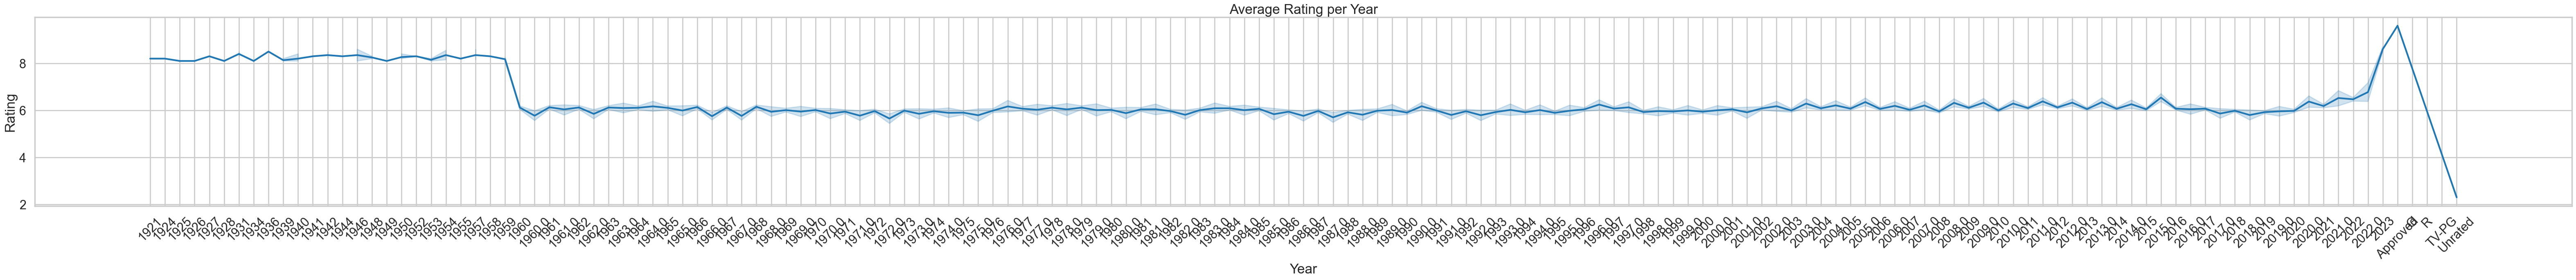

In [5]:
# Average rating for each year
# Ensure the 'year' column is of type str
df['year'] = df['year'].astype(str)

# Sort the DataFrame by 'year' in ascending order
df = df.sort_values(by='year')

# Set Seaborn style and context
sns.set_style('whitegrid')
sns.set_context('poster')

# Create the line plot
plt.figure(figsize=(80, 6))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Rating per Year')
sns.lineplot(x='year', y='rating', data=df)

# Show the plot
plt.show()




<AxesSubplot: title={'center': 'Number of Movies per Year'}, xlabel='Year', ylabel='Number of Movies'>

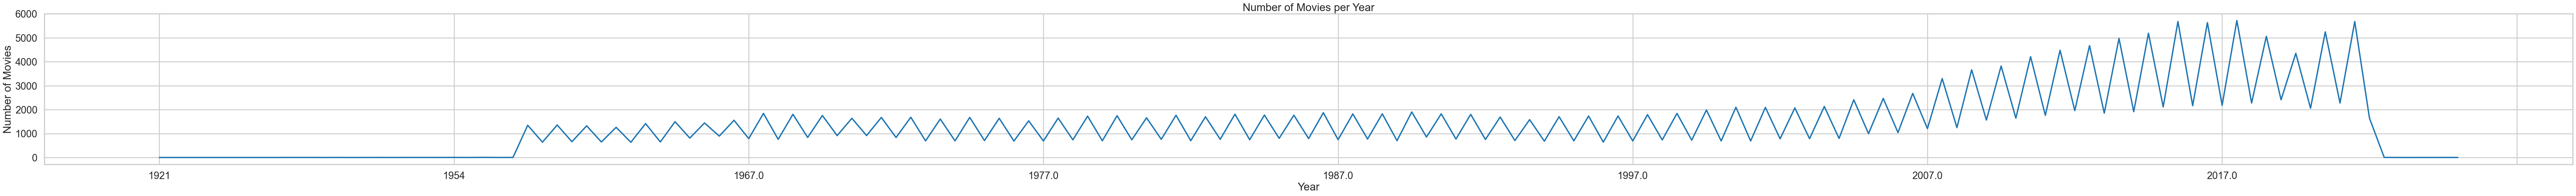

In [6]:
# how many movies are there per year
df.groupby('year').count()['title'].plot(figsize=(100,6), title='Number of Movies per Year', xlabel='Year', ylabel='Number of Movies')

In [7]:

# Đếm số lượng bộ phim có giá trị NULL (hoặc thiếu) trong mỗi trường
null_counts = df.isnull().sum()

# Hiển thị số lượng bộ phim có giá trị NULL trong từng trường
print("Null counts in each column:")
print(null_counts)

# Hiển thị số lượng bộ phim trước khi xóa bất kỳ
num_movies_before_deletion = len(df)
print(f"Number of movies before deletion: {num_movies_before_deletion}")

# Xóa bất kỳ bộ phim nào có giá trị NULL trong các trường quan trọng
important_columns = ['title', 'genres', 'rating', 'year', 'overview', 'duration']
df = df.dropna(subset=important_columns)

# Hiển thị số lượng bộ phim sau khi xóa
num_movies_after_deletion = len(df)
print(f"Number of movies after deletion: {num_movies_after_deletion}")


Null counts in each column:
title                      0
img_url                    0
year                       0
director               15885
stars                  30492
duration               76700
genres                 41331
overview              105224
rating                123672
num_rating            123672
num_user_review       168747
num_critic_review     201426
budget                182782
gross                 209143
country                 5041
metascore             220089
oscar                 191997
win_and_nomination    191996
url                        0
dtype: int64
Number of movies before deletion: 222169
Number of movies after deletion: 63737


In [8]:
# create new columns for each genre
df['genres'] = df['genres'].fillna('')
df['genres'] = df['genres'].str.split(',')
unique_genres = set(genre for genres in df['genres'] for genre in genres)
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)
df.head(2)


,title,img_url,year,director,stars,duration,genres,overview,rating,num_rating,...,Musical,Sport,Animation,News,Film-Noir,Family,Western,Adventure,Crime,Music
222027,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,1921,Charles Chaplin,"Charles Chaplin,Edna Purviance,Jackie Coogan,C...",1h 8m,"[Comedy, Drama, Family]","The Tramp cares for an abandoned child, but ev...",8.2,132K,...,0,0,0,0,0,1,0,0,0,0
222025,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,1924,Buster Keaton,"Buster Keaton,Kathryn McGuire,Joe Keaton,Buste...",45m,"[Action, Comedy, Romance]","A film projectionist longs to be a detective, ...",8.2,54K,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# if a movies is in the genre of 'Music' then update the 'Musical' column to 1
df.loc[df['Music'] == 1, 'Musical'] = 1
# if a movies is in the genre of 'Musical' then update the 'Music' column to 1
df.loc[df['Musical'] == 1, 'Music'] = 1
df['Music'].sum(), df['Musical'].sum()

(2240, 2240)

In [10]:
# drop the 'Musical' column
df = df.drop(['Musical'], axis=1)

In [11]:
len(df.columns)

42

In [12]:
# ???
img1 = df['img_url'][0]
img1

'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_FMjpg_UX1000_.jpg'

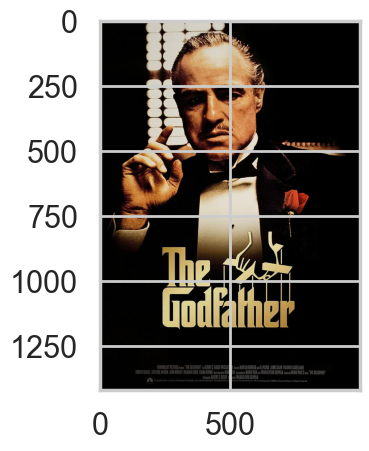

In [13]:
import PIL
import urllib

plt.imshow(np.array(PIL.Image.open(urllib.request.urlopen(img1))))

In [14]:
# Define a function to convert 'K' and 'M' to integers
def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return int(float(value.replace('M', '')) * 1000000)
    else:
        return int(value)

# Apply the function to convert 'num_rating' values to integers
df['num_rating'] = df['num_rating'].apply(convert_to_int)

# Display the updated DataFrame
print(df)


                                      title  \
222027                              The Kid   
222025                         Sherlock Jr.   
221960                        The Gold Rush   
221962                          The General   
222078                           Metropolis   
...                                     ...   
41024                               Mixtape   
222155  Spider-Man: Across the Spider-Verse   
222143                          Oppenheimer   
163883                        Hidden Agenda   
196737                   Night of the Clown   

                                                  img_url      year  \
222027  https://m.media-amazon.com/images/M/MV5BZjhhMT...      1921   
222025  https://m.media-amazon.com/images/M/MV5BZWFhOG...      1924   
221960  https://m.media-amazon.com/images/M/MV5BZjEyOT...      1925   
221962  https://m.media-amazon.com/images/M/MV5BYmRiMD...      1926   
222078  https://m.media-amazon.com/images/M/MV5BMTg5YW...      1927   
...      

In [15]:
# Lấy tất cả các giá trị duy nhất của cột 'year'
unique_years = df['year'].unique()

# In tất cả các giá trị duy nhất
for year in unique_years:
    print(year)

# xóa các giá trị không phải số trong cột 'year'
df = df[df['year'].str.isnumeric()]

# Chuyển cột 'year' thành kiểu dữ liệu số nguyên, bỏ .0
df['year'] = df['year'].astype(int)


1921
1924
1925
1926
1927
1928
1931
1934
1936
1939
1940
1941
1942
1944
1946
1948
1949
1950
1952
1953
1954
1955
1957
1958
1959
1960
1960.0
1961
1961.0
1962
1962.0
1963
1963.0
1964
1964.0
1965
1965.0
1966
1966.0
1967
1967.0
1968
1968.0
1969
1969.0
1970
1970.0
1971
1971.0
1972
1972.0
1973
1973.0
1974
1974.0
1975
1975.0
1976
1976.0
1977
1977.0
1978
1978.0
1979
1979.0
1980
1980.0
1981
1981.0
1982
1982.0
1983
1983.0
1984
1984.0
1985
1985.0
1986
1986.0
1987
1987.0
1988
1988.0
1989
1989.0
1990
1990.0
1991
1991.0
1992
1992.0
1993
1993.0
1994
1994.0
1995
1995.0
1996
1996.0
1997
1997.0
1998
1998.0
1999
1999.0
2000
2000.0
2001
2001.0
2002
2002.0
2003
2003.0
2004
2004.0
2005
2005.0
2006
2006.0
2007
2007.0
2008
2008.0
2009
2009.0
2010
2010.0
2011
2011.0
2012
2012.0
2013
2013.0
2014
2014.0
2015
2015.0
2016
2016.0
2017
2017.0
2018
2018.0
2019
2019.0
2020
2020.0
2021
2021.0
2022
2022.0
2023
Approved
Unrated


In [16]:
# Lấy lại tất cả các giá trị duy nhất của cột 'year'
for year in df['year'].unique():
    print(year)

1921
1924
1925
1926
1927
1928
1931
1934
1936
1939
1940
1941
1942
1944
1946
1948
1949
1950
1952
1953
1954
1955
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [17]:
# Define a function to convert 'duration' to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.strip('h')) * 60
        elif 'm' in part:
            total_minutes += int(part.strip('m'))
    return total_minutes

# Apply the function to convert 'duration' values to minutes
df['duration'] = df['duration'].apply(convert_duration_to_minutes)

# Display the updated DataFrame
with pd.option_context('display.max_columns', None):
    print(df)


                                      title  \
222027                              The Kid   
222025                         Sherlock Jr.   
221960                        The Gold Rush   
221962                          The General   
222078                           Metropolis   
...                                     ...   
197499                               Ryadom   
215014                                   3E   
208482            1000 deshevykh zazhigalok   
222155  Spider-Man: Across the Spider-Verse   
222143                          Oppenheimer   

                                                  img_url  year  \
222027  https://m.media-amazon.com/images/M/MV5BZjhhMT...  1921   
222025  https://m.media-amazon.com/images/M/MV5BZWFhOG...  1924   
221960  https://m.media-amazon.com/images/M/MV5BZjEyOT...  1925   
221962  https://m.media-amazon.com/images/M/MV5BYmRiMD...  1926   
222078  https://m.media-amazon.com/images/M/MV5BMTg5YW...  1927   
...                              

In [18]:
# oscar count
# Define a function to extract the number of Oscars won
def extract_oscar_count(oscar_str):
    if isinstance(oscar_str, str) and 'oscar' in oscar_str.lower() and 'won' in oscar_str.lower():
        # Extract the number of Oscars won
        words = oscar_str.split()
        for i in range(len(words)):
            if words[i].isdigit() and words[i + 1].lower() == 'oscar' and words[i - 1].lower() == 'won':
                return int(words[i])
    # If not 'won' and 'oscar' or no number found, return 0
    return 0

# Apply the function to convert 'oscar' values to the number of Oscars won
df['oscar'] = df['oscar'].apply(extract_oscar_count)

# Display the updated DataFrame
with(pd.option_context('display.max_columns', None)):
    print(df)



                                      title  \
222027                              The Kid   
222025                         Sherlock Jr.   
221960                        The Gold Rush   
221962                          The General   
222078                           Metropolis   
...                                     ...   
197499                               Ryadom   
215014                                   3E   
208482            1000 deshevykh zazhigalok   
222155  Spider-Man: Across the Spider-Verse   
222143                          Oppenheimer   

                                                  img_url  year  \
222027  https://m.media-amazon.com/images/M/MV5BZjhhMT...  1921   
222025  https://m.media-amazon.com/images/M/MV5BZWFhOG...  1924   
221960  https://m.media-amazon.com/images/M/MV5BZjEyOT...  1925   
221962  https://m.media-amazon.com/images/M/MV5BYmRiMD...  1926   
222078  https://m.media-amazon.com/images/M/MV5BMTg5YW...  1927   
...                              

In [19]:
#budget processing
df["budget"] = df["budget"].astype(str)
df["budget"] = df["budget"].map(lambda x: x.rstrip(" (estimated)"))
df["budget"] = df["budget"].map(lambda x: x.replace(",", ""))


In [20]:
# split digit part and character part

df["estimated_budget"] = df["budget"].str.extract("(\d+)")
df["budget_unit"] = df["budget"].str.extract("(\D+)")


In [21]:
# get all the unique values of budget_unit
df["budget_unit"].unique()
# if there exist a \xa0, replace it with a ' '
df["budget_unit"] = df["budget_unit"].map(lambda x: x.replace("\xa0", "").replace("\u202fCFA", ""))
df["budget_unit"].unique()

array(['$', 'nan', 'DEM', '¥', 'NLG', 'RON', '₩', '£', 'AZM', 'CA$', '₱',
       'CHF', 'DKK', 'FIM', 'PTE', 'ROL', 'ESP', 'SEK', '₹', 'PKR', 'EGP',
       'FRF', 'A$', 'TRL', 'XAU', 'NZ$', 'GRD', 'ITL', 'CN¥', 'BEF',
       'IDR', '€', 'NOK', 'MX$', 'LUF', 'IRR', 'RUR', 'HK$', 'THB', 'ZAR',
       'SIT', 'HUF', 'ISK', 'LTL', 'R$', 'DOP', 'MYR', 'LKR', 'HRK',
       'SGD', 'PLN', 'EEK', 'EC$', 'CZK', 'IEP', 'BGL', 'CLP', 'YUM',
       'NT$', 'MMK', '₫', 'VEB', '₪', 'COP', 'SKK', 'BDT', 'MTL', 'ARS',
       'GTQ', 'MVR', 'GEL', 'LVL', 'MAD', 'UAH', 'MOP', 'KZT', 'NPR',
       'NGN', 'JOD', 'PEN', 'BHD', 'PYG', 'ANG', 'BTN', 'MNT', 'AED',
       'TND', 'DZD', 'HNL', 'BAM', 'KPW', 'KES', 'GHC', 'RWF', 'MKD',
       'UZS', 'UGX', 'LBP', 'AMD', 'CDF', 'ALL', 'FCFA', 'KWD'],
      dtype=object)

In [22]:
# Các đơn vị tiền tệ và tỷ lệ chuyển đổi sang đô la
currency_conversion = {
    '$': 1,    # Đô la Mỹ
    'A$': 0.75,  # Đô la Úc
    '£': 1.32,   # Bảng Anh
    'SEK': 0.11,  # Krona Thụy Điển
    'DKK': 0.16,  # Krone Đan Mạch
    '₹': 0.014,  # Rupee Ấn Độ
    '€': 1.18,   # Euro
    'CA$': 0.79,  # Đô la Canada
    'DEM': 0.61,  # Đức Mark
    '¥': 0.15,    # Yên Nhật
    'TRL': 0.13,  # Lira Thổ Nhĩ Kỳ
    'R$': 0.19,   # Real
    'CN¥': 0.15,  # Nhân dân tệ
    'PLN': 0.27,  # Zloty Ba Lan
    'FRF': 0.18,  # Pháp Franc
    '₩': 0.00084, # Won Hàn Quốc
    'FIM': 0.18,  # Markka Phần Lan
    'RUR': 0.013, # Ruble Nga
    'SGD': 0.74,  # Đô la Singapore
    'HUF': 0.0034,# Forint Hungary
    'NOK': 0.11,  # Krone Na Uy
    'MX$': 0.049, # Peso Mexico
    'NZ$': 0.69,  # Đô la New Zealand
    'HK$': 0.13,  # Đô la Hồng Kông
    'IDR': 0.000071, # Rupiah Indonesia
    'ESP': 0.0066, # Peseta Tây Ban Nha
    'ISK': 0.0079, # Króna Iceland
    'CHF': 1.09,  # Franc Thụy Sĩ
    'VEB': 0.0000000000000001, # Bolívar Venezuela
    'ALL': 0.0094, # Lek Albania
    'PKR': 0.0059, # Rupee Pakistan
    'BEF': 0.031, # Franc Bỉ
    'EGP': 0.064, # Bảng Ai Cập
    'DOP': 0.017, # Peso Dominica
    'ZAR': 0.067, # Rand Nam Phi
    'NGN': 0.0026, # Naira Nigeria
    'THB': 0.032, # Baht Thái Lan
    'IRR': 0.000024, # Rial Iran
    'LTL': 0.32, # Litas Litva
    'BDT': 0.012, # Taka Bangladesh
    'MYR': 0.24, # Ringgit Malaysia
    'LKR': 0.0054, # Rupee Sri Lanka
    'NT$': 0.035, # Đô la Đài Loan
    'CZK': 0.044, # Koruna Cộng hòa Séc
    'ARS': 0.011, # Peso Argentina
    'GEL': 0.31, # Lari Georgia
    'MNT': 0.00035, # Tugrik Mông Cổ
    'UZS': 0.000095, # Som Uzbekistan
    '₱': 0.021, # Peso Philipin
    'NLG': 0.59, # Guilder Hà Lan
    'ITL': 0.00061, # Lira Ý
    'NAD': 0.067, # Đô la Namibia
    'ROL': 0.00024, # Leu Rumani
    'EEK': 0.075, # Kroon Estonia
    'GTQ': 0.13, # Quetzal Guatemala
    'HNL': 0.041, # Lempira Honduras
    'XAU': 1.88, # Vàng
    'AED': 0.27, # Dirham UAE
    'COP': 0.00027, # Peso Colombia
    'PEN': 0.29, # Sol Peru
    'MOP': 0.12, # Pataca Ma Cao
    'SIT': 0.0059, # Tolar Slovenia
    'NPR': 0.0085, # Rupee Nepal
    'PTE': 0.0059, # Escudo Bồ Đào Nha
    '₪': 4.06, 
    'BGL': 0.61, # Lev Bulgaria
    'MAD': 0.11, # Dirham Ma-rốc
    'UAH': 0.037, # Hryvnia Ukraina
    'MKD': 0.019, # Denar Macedonia
    'KES': 0.0092, # Shilling Kenya
    'HRK': 0.16, # Kuna Croatia
    'KWD': 3.29, # Dinar Kuwait
    'MMK': 0.00074, # Kyat Myanma
    'KZT': 0.0024, # Tenge Kazakhstan
    'AZM': 0.00012, # Manat Azerbaijan
    'GHC': 0.00018, # Cedi Ghana
    'JOD': 1.41, # Dinar Jordan
    '₫': 0.000043, # Đồng Việt Nam
    'ANG': 0.56, # Guilder Antille thuộc Hà Lan
    'LVL': 1.59, # Lats Latvia
    'MVR': 0.064, # Rufiyaa Maldives
    'LUF': 0.031, # Franc Luxembourg
    'UGX': 0.00027, # Shilling Uganda
    'IQD': 0.00084, # Dinar Iraq
    'GRD' : 0.0031, # Drachma Hy Lạp
    'LYD' : 0.23, # Dinar Libya
    'BYR' : 0.000041, # Ruble Belarus
    'AMD' : 0.0021, # Dram Armenia
    'TTD' : 0.15, # Đô la Trinidad và Tobago
    'RON' : 0.24, # Leu Romania
    'ATS' : 0.073, # Schilling Áo
    'BAM' : 0.61, # Mark Bosnia và Herzegovina
    'BSD' : 1, # Đô la Bahamas
    'OMR' : 2.60, # Rial Oman
    'CLP' : 0.0013, # Peso Chile
    'BHD' : 2.65, # Dinar Bahrain
    'SZL' : 0.067, # Lilangeni Swaziland
    'KGS' : 0.012, # Som Kyrgyzstan
    'ZMK' : 0.00011, # Kwacha Zambia
    'SLL' : 0.00010, # Leone Sierra Leone
    'TZS' : 0.00043, # Shilling Tanzania
    'DZD' : 0.0074, # Dinar Algeria
    'F' : 0.18, # Franc Pháp
    'TND' : 0.37, # Dinar Tunisia
    'CDF' : 0.00055, # Franc Congo
    'KHR' : 0.00025, # Riel Campuchia
    'AFA' : 0.000018, # Afghani Afghanistan
    'BTN' : 0.013, # Ngultrum Bhutan
    'YUM' : 0.00084, # Dinar Nam Tư
    'ETB' : 0.029, # Birr Ethiopia
    'CRC' : 0.0017, # Colón Costa Rica
    'TMM' : 0.0000000000000001, # Manat Turkmenistan
    'QAR' : 0.27, # Rial Qatar
    'SYP' : 0.0019, # Bảng Syria
    'PYG' : 0.00015, # Guarani Paraguay
    'MUR' : 0.022, # Rupee Mauritius
    'FJD' : 0.48, # Đô la Fiji
    'IEP' : 1.52, # Bảng Ireland
    'SOS' : 0.0017, # Shilling Somalia
    'CUP' : 0.038, # Peso Cuba
    'SDD' : 0.0000000000000001, # Dinar Sudan
    'ZWD' : 0.0029, # Đô la Zimbabwe
    'EC$' : 0.37, # Đô la Đông Caribê
    'UYU' : 0.023, # Peso Uruguay
    'BOB' : 0.15, # Boliviano Bolivia
    'LBP' : 0.00066, # Bảng Li-băng
    'SKK' : 0.036, # Koruna Slovakia
    'RWF' : 0.0010, # Franc Rwanda
    'BIF' : 0.00052, # Franc Burundi
    'JMD' : 0.0067, # Đô la Jamaica
    'FCFA' : 0.0018, # Franc CFA Trung Phi
    'MTL' : 0.00028, # Lira Malta
    'KPW' : 0.0011, # Won Triều Tiên
    'BBD'  : 0.50, # Đô la Barbados
    'AWG' : 0.56, # Florin Aruba 
}

def convert_budget_to_usd(row):
    if row['budget_unit'] in currency_conversion:
        # Convert the extracted budget to float and apply the exchange rate
        return float(row['estimated_budget']) / currency_conversion[row['budget_unit']]
    return float(row['estimated_budget'])

# Apply the conversion function to create a 'budget_usd' column
df["budget_unit"].fillna('USD', inplace=True)  # Assuming missing units are USD
df['budget_usd'] = df.apply(convert_budget_to_usd, axis=1)

# Display the updated DataFrame
print(df[['title', 'budget', 'budget_usd']])



                                      title        budget    budget_usd
222027                              The Kid       $250000  2.500000e+05
222025                         Sherlock Jr.           nan           NaN
221960                        The Gold Rush       $923000  9.230000e+05
221962                          The General       $750000  7.500000e+05
222078                           Metropolis   DEM 6000000  9.836066e+06
...                                     ...           ...           ...
197499                               Ryadom  RUR 25000000  1.923077e+09
215014                                   3E           nan           NaN
208482            1000 deshevykh zazhigalok           nan           NaN
222155  Spider-Man: Across the Spider-Verse    $150000000  1.500000e+08
222143                          Oppenheimer    $100000000  1.000000e+08

[58642 rows x 3 columns]


In [23]:
#gross processing
df["gross"] = df["gross"].astype(str)
df["gross"] = df["gross"].map(lambda x: x.replace(",", ""))
# split digit part and character part
df["estimated_gross"] = df["gross"].str.extract("(\d+)")
df["gross_unit"] = df["gross"].str.extract("(\D+)")


In [24]:
# get all the unique values of budget_unit
df["gross_unit"].unique()
# if there exist a \xa0, replace it with a ' '
df["gross_unit"] = df["gross_unit"].map(lambda x: x.replace("\xa0", "").replace("\u202fCFA", ""))
df["gross_unit"].unique()

array(['$', 'nan', '€', '₹'], dtype=object)

In [25]:
# Các đơn vị tiền tệ và tỷ lệ chuyển đổi sang đô la
currency_conversion = {
    '$': 1,    # Đô la Mỹ
    '₹': 0.014,  # Rupee Ấn Độ
    '€': 1.18,   # Euro
}

def convert_gross_to_usd(row):
    if row['gross_unit'] in currency_conversion:
        # Convert the extracted budget to float and apply the exchange rate
        return float(row['estimated_gross']) / currency_conversion[row['gross_unit']]
    return float(row['estimated_gross'])

# Apply the conversion function to create a 'budget_usd' column
df["gross_unit"].fillna('USD', inplace=True)  # Assuming missing units are USD
df['gross_usd'] = df.apply(convert_gross_to_usd, axis=1)

# Display the updated DataFrame
print(df[['title', 'gross', 'gross_usd']])



                                      title       gross    gross_usd
222027                              The Kid      $41960      41960.0
222025                         Sherlock Jr.         nan          NaN
221960                        The Gold Rush      $29328      29328.0
221962                          The General         nan          NaN
222078                           Metropolis    $1349711    1349711.0
...                                     ...         ...          ...
197499                               Ryadom       $8691       8691.0
215014                                   3E         nan          NaN
208482            1000 deshevykh zazhigalok      $18465      18465.0
222155  Spider-Man: Across the Spider-Verse  $690001944  690001944.0
222143                          Oppenheimer  $942199940  942199940.0

[58642 rows x 3 columns]


In [26]:
# Extract wins and nominations and create new columns
wins = df['win_and_nomination'].str.extract(r'(\d+) wins?')
nominations = df['win_and_nomination'].str.extract(r'(\d+) nominations?')

# Fill missing values with 0
wins.fillna(0, inplace=True)
nominations.fillna(0, inplace=True)

# Add the extracted columns to the DataFrame
df['win'] = wins
df['nomination'] = nominations
# Display the updated DataFrame
print(df)


                                      title  \
222027                              The Kid   
222025                         Sherlock Jr.   
221960                        The Gold Rush   
221962                          The General   
222078                           Metropolis   
...                                     ...   
197499                               Ryadom   
215014                                   3E   
208482            1000 deshevykh zazhigalok   
222155  Spider-Man: Across the Spider-Verse   
222143                          Oppenheimer   

                                                  img_url  year  \
222027  https://m.media-amazon.com/images/M/MV5BZjhhMT...  1921   
222025  https://m.media-amazon.com/images/M/MV5BZWFhOG...  1924   
221960  https://m.media-amazon.com/images/M/MV5BZjEyOT...  1925   
221962  https://m.media-amazon.com/images/M/MV5BYmRiMD...  1926   
222078  https://m.media-amazon.com/images/M/MV5BMTg5YW...  1927   
...                              

In [27]:
# url -> movie_id
df['movie_id'] = df['url'].str.split('/').str[-2]

# Display the updated DataFrame
with pd.option_context('display.max_columns', None):
    print(df)

                                      title  \
222027                              The Kid   
222025                         Sherlock Jr.   
221960                        The Gold Rush   
221962                          The General   
222078                           Metropolis   
...                                     ...   
197499                               Ryadom   
215014                                   3E   
208482            1000 deshevykh zazhigalok   
222155  Spider-Man: Across the Spider-Verse   
222143                          Oppenheimer   

                                                  img_url  year  \
222027  https://m.media-amazon.com/images/M/MV5BZjhhMT...  1921   
222025  https://m.media-amazon.com/images/M/MV5BZWFhOG...  1924   
221960  https://m.media-amazon.com/images/M/MV5BZjEyOT...  1925   
221962  https://m.media-amazon.com/images/M/MV5BYmRiMD...  1926   
222078  https://m.media-amazon.com/images/M/MV5BMTg5YW...  1927   
...                              

In [28]:
# drop column budget_unit, gross_unit, win_and_nomination
df = df.drop(['budget_unit', 'gross_unit', 'win_and_nomination'], axis=1)

In [29]:
# delete dubplicate movies by movie_id
df = df.drop_duplicates(subset=['movie_id'])
# check if there is any duplicate movie_id
df['movie_id'].duplicated().sum()

13

In [30]:
# export data frame to csv and save in cleaned_data folder
df.to_csv('../cleaned_data/cleaned_movie_data.csv', index=False)
